## openSMILE tutorial: working with DataFrames and plotting data
In this tutorial notebook, you will see how to work with openSMILE, and how to get interesting plots from extracted audio features, using Python. In this notebook specifically, I'll show you how to plot formants.

**Library used**: because I discovered `polars` very recently (equivalent to `pandas` except much faster and more efficient _and_ more practical!), I tried to work with that here. I kept all the code used with `pandas` in order to show both ways of working out with openSMILE's resulting DataFrame. Hopefully it all makes sense! If you're new to this, start with `pandas`. :)

In [1]:
# needed libraries
import opensmile
# DataFrame libraries
import pandas as pd
import polars as pl
# to work through folders/files
import glob
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# open file: openSMILE only needs your .wav file
# replace path_to_folder with your path!!
path_to_folder = "../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/"
waves = glob.glob(path_to_folder + "*.wav")
# glob.glob gets a list of all the files it finds in the folder_path you

In [3]:
wave_test = waves[0]  # selects one .wav file
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors
)
results = smile.process_file(wave_test)  # resulting dataframe (format used is pandas')
results.head() # display five first rows

Loudness_sma3  \
file                                               start                  end                                     
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       0.761338   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       0.861650   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000       0.926805   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000       0.919135   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000       0.832892   

                                                                                                  alphaRatio_sma3  \
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       -15.132652   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       -12.217633   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000        -7.047127   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000        -3.142523   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000        -1.508592   

                                                                                                  hammarbergIndex_sma3  \
file                                               start                  end                                            
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000             20.419188   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000             16.963375   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000             12.900142   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000             10.381233   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000             10.647013   

                                                                                                  slope0-500_sma3  \
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000         0.074227   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000         0.097234   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000         0.115195   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000         0.127271   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000         0.105820   

                                                                                                  slope500-1500_sma3  \
file                                               start                  end                                          
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000           -0.028998   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000           -0.023988   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000           -0.016826   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000           -0.014209   
                                                   0 days 00:00:00.040000 0 d

To make it simple: a DataFrame is class object proper to `pandas` (and now `polars`). According to `pandas`' documentation: *DataFrame is a 2-dimensional labeled data structure with columns of potentially different types*. Think of it as a spreadsheet, a table etc. DataFrames allow us to work with files such as .csv, .tsv... With this kind of object, it's pretty practical to work with large datasets! In `pandas`, a DataFrame consists of one or more indexes, and multiple columns. A column object is a `Series` class object. You can work on it in a DataFrame or separately. 

As you can see here, we're working with 3 indexes: `file`, `start`, and `end`, the last two being time dimensions. If those look weird, it's because of the data type: time here is expressed as a "duration" (the corresponding `pandas` datatype is `timedelta`). We'll convert those later to make things easier.

Before working on a DataFrame, you might want to have some information such as column names, datatypes, or in some cases a few statistics! Pandas functions that will help you with that:
- `.describe()`: get a statistics summary (mean, std; min, max, quartiles...)
- `.info()`: index, column names, value counts, and datatype
- `.index`: returns index values (when working with a dataframe that has a single index!)
    - in our case, you could use `results.index.values` to get an array with all index values.
- `.columns()`: returns list of column names.

If working with `polars`: you can use the `.describe()` function. In `polars` it is equivalent to `pandas`' `.info()`. You also have the `.glimpse()` function which returns a condensed description of the DataFrame.

In [4]:
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 309 entries, ('../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav', Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00.020000')) to ('../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav', Timedelta('0 days 00:00:03.080000'), Timedelta('0 days 00:00:03.130000'))
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loudness_sma3                309 non-null    float32
 1   alphaRatio_sma3              309 non-null    float32
 2   hammarbergIndex_sma3         309 non-null    float32
 3   slope0-500_sma3              309 non-null    float32
 4   slope500-1500_sma3           309 non-null    float32
 5   F0semitoneFrom27.5Hz_sma3nz  309 non-null    float32
 6   jitterLocal_sma3nz           309 non-null    float32
 7   shimmerLocaldB_sma3nz        309 non-null    float3

#### first steps with `pandas`

In [5]:
# renaming dataframe for the sake of it
results_pd = pd.DataFrame(results)
results_pd.head()

Loudness_sma3  \
file                                               start                  end                                     
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       0.761338   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       0.861650   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000       0.926805   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000       0.919135   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000       0.832892   

                                                                                                  alphaRatio_sma3  \
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000       -15.132652   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000       -12.217633   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000        -7.047127   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000        -3.142523   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000        -1.508592   

                                                                                                  hammarbergIndex_sma3  \
file                                               start                  end                                            
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000             20.419188   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000             16.963375   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000             12.900142   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000             10.381233   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000             10.647013   

                                                                                                  slope0-500_sma3  \
file                                               start                  end                                       
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000         0.074227   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000         0.097234   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000         0.115195   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000         0.127271   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000         0.105820   

                                                                                                  slope500-1500_sma3  \
file                                               start                  end                                          
../../aligned/aligner-corpus/Anita_MUSSO_F_46_1... 0 days 00:00:00        0 days 00:00:00.020000           -0.028998   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000           -0.023988   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000           -0.016826   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000           -0.014209   
                                                   0 days 00:00:00.040000 0 d

In [6]:
results_pd.reset_index(inplace=True, level=['start', 'end'])
# convert timedelta to seconds
results_pd['start'] = results_pd['start'].dt.total_seconds()
results_pd['end'] = results_pd['end'].dt.total_seconds()
# display
results_pd.head()

,start,end,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,F0semitoneFrom27.5Hz_sma3nz,jitterLocal_sma3nz,shimmerLocaldB_sma3nz,HNRdBACF_sma3nz,logRelF0-H1-H2_sma3nz,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3amplitudeLogRelF0_sma3nz
file,,,,,,,,,,,,,,,,,,,,
../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav,0.00,0.02,0.761338,-15.132652,20.419188,0.074227,-0.028998,0.0,0.0,0.0,0.0,0.0,0.0,322.949188,986.320984,-201.0,1548.005981,-201.0,2429.194092,-201.0
../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav,0.01,0.03,0.861650,-12.217633,16.963375,0.097234,-0.023988,0.0,0.0,0.0,0.0,0.0,0.0,306.130249,1014.673157,-201.0,1507.046753,-201.0,2417.271240,-201.0
../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav,0.02,0.04,0.926805,-7.047127,12.900142,0.115195,-0.016826,0.0,0.0,0.0,0.0,0.0,0.0,629.725769,771.163086,-201.0,1760.782593,-201.0,2779.095459,-201.0
../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav,0.03,0.05,0.919135,-3.142523,10.381233,0.127271,-0.014209,0.0,0.0,0.0,0.0,0.0,0.0,921.002136,519.013367,-201.0,2015.073608,-201.0,3094.148682,-201.0
../../aligned/aligner-corpus/Anita_MUSSO_F_46_11e-v2/Anita Musso_1056.942_1060.072.wav,0.04,0.06,0.832892,-1.508592,10.647013,0.105820,-0.014625,0.0,0.0,0.0,0.0,0.0,0.0,1236.671997,210.182022,-201.0,2291.406494,-201.0,3412.530029,-201.0


In [7]:
# get list of columns/features
results_pd.columns

Index(['start', 'end', 'Loudness_sma3', 'alphaRatio_sma3',
       'hammarbergIndex_sma3', 'slope0-500_sma3', 'slope500-1500_sma3',
       'F0semitoneFrom27.5Hz_sma3nz', 'jitterLocal_sma3nz',
       'shimmerLocaldB_sma3nz', 'HNRdBACF_sma3nz', 'logRelF0-H1-H2_sma3nz',
       'logRelF0-H1-A3_sma3nz', 'F1frequency_sma3nz', 'F1bandwidth_sma3nz',
       'F1amplitudeLogRelF0_sma3nz', 'F2frequency_sma3nz',
       'F2amplitudeLogRelF0_sma3nz', 'F3frequency_sma3nz',
       'F3amplitudeLogRelF0_sma3nz'],
      dtype='object')

In [8]:
# save csv file
results_pd.to_csv('extracted_features_pandas.csv')

#### first steps with `polars`
Unlike `pandas`, `polars` does not work with index, which is an interesting feature for various reasons, but in our case, we still need the time dimension.

In [9]:
# results_pl = pl.read_csv('extracted_features.csv', separator=',')
# easiest way to work this out is to convert pandas DataFrame to polars!!!
results_pl = pl.from_pandas(results, include_index=True) # keep indexes but as columns
results_pl = results_pl.drop('file') # dropping file column because unecessary (always same value)
results_pl.head()

start,end,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,F0semitoneFrom27.5Hz_sma3nz,jitterLocal_sma3nz,shimmerLocaldB_sma3nz,HNRdBACF_sma3nz,logRelF0-H1-H2_sma3nz,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3amplitudeLogRelF0_sma3nz
duration[ns],duration[ns],f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0ns,20ms,0.761338,-15.132652,20.419188,0.074227,-0.028998,0.0,0.0,0.0,0.0,0.0,0.0,322.949188,986.320984,-201.0,1548.005981,-201.0,2429.194092,-201.0
10ms,30ms,0.86165,-12.217633,16.963375,0.097234,-0.023988,0.0,0.0,0.0,0.0,0.0,0.0,306.130249,1014.673157,-201.0,1507.046753,-201.0,2417.27124,-201.0
20ms,40ms,0.926805,-7.047127,12.900142,0.115195,-0.016826,0.0,0.0,0.0,0.0,0.0,0.0,629.725769,771.163086,-201.0,1760.782593,-201.0,2779.095459,-201.0
30ms,50ms,0.919135,-3.142523,10.381233,0.127271,-0.014209,0.0,0.0,0.0,0.0,0.0,0.0,921.002136,519.013367,-201.0,2015.073608,-201.0,3094.148682,-201.0
40ms,60ms,0.832892,-1.508592,10.647013,0.10582,-0.014625,0.0,0.0,0.0,0.0,0.0,0.0,1236.671997,210.182022,-201.0,2291.406494,-201.0,3412.530029,-201.0


In [10]:
# convert durations (pandas equivalent: timedelta) to time (ms)
results_pl = results_pl.with_columns(
                    pl.col('start').dt.milliseconds(), 
                    pl.col('end').dt.milliseconds())
results_pl.head()

start,end,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,F0semitoneFrom27.5Hz_sma3nz,jitterLocal_sma3nz,shimmerLocaldB_sma3nz,HNRdBACF_sma3nz,logRelF0-H1-H2_sma3nz,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3amplitudeLogRelF0_sma3nz
i64,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,20,0.761338,-15.132652,20.419188,0.074227,-0.028998,0.0,0.0,0.0,0.0,0.0,0.0,322.949188,986.320984,-201.0,1548.005981,-201.0,2429.194092,-201.0
10,30,0.86165,-12.217633,16.963375,0.097234,-0.023988,0.0,0.0,0.0,0.0,0.0,0.0,306.130249,1014.673157,-201.0,1507.046753,-201.0,2417.27124,-201.0
20,40,0.926805,-7.047127,12.900142,0.115195,-0.016826,0.0,0.0,0.0,0.0,0.0,0.0,629.725769,771.163086,-201.0,1760.782593,-201.0,2779.095459,-201.0
30,50,0.919135,-3.142523,10.381233,0.127271,-0.014209,0.0,0.0,0.0,0.0,0.0,0.0,921.002136,519.013367,-201.0,2015.073608,-201.0,3094.148682,-201.0
40,60,0.832892,-1.508592,10.647013,0.10582,-0.014625,0.0,0.0,0.0,0.0,0.0,0.0,1236.671997,210.182022,-201.0,2291.406494,-201.0,3412.530029,-201.0


In [11]:
# save file to csv
results_pl.write_csv("extracted_features_pl.csv")

### Extracting formants
Here, I'll show you how to plot the extracted formants! Again, first using `pandas`, then `polars`. :) With `pandas`, we'll use `seaborn`, a plotting library based of `matplotlib` that helps you plot data from dataframes.
#### with `pandas`
Using `results_pd` DataFrame.

In [12]:
# extract center formant frequencies
df = pd.read_csv('extracted_features_pandas.csv')
centerformantfreqs = ['start','F1frequency_sma3nz',
                      'F2frequency_sma3nz', 'F3frequency_sma3nz']
formants = df[centerformantfreqs] # new dataframe with the columns we are interested in only
# resulting dataframe
formants.head()

,start,F1frequency_sma3nz,F2frequency_sma3nz,F3frequency_sma3nz
0,0.00,322.94920,1548.0060,2429.1940
1,0.01,306.13025,1507.0468,2417.2712
2,0.02,629.72577,1760.7826,2779.0955
3,0.03,921.00214,2015.0736,3094.1487
4,0.04,1236.67200,2291.4065,3412.5300


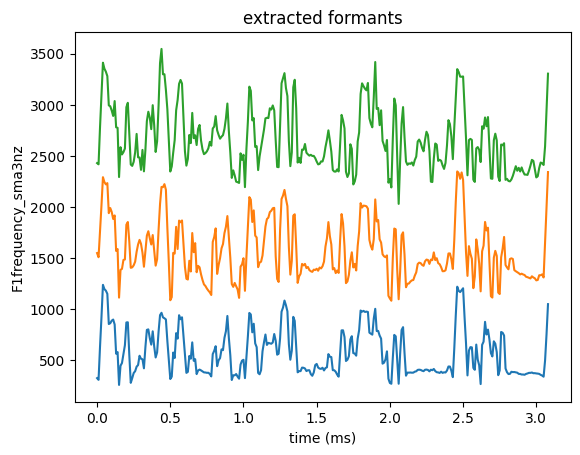

In [13]:
sns.lineplot(data=formants, x='start', y='F1frequency_sma3nz')
sns.lineplot(data=formants, x='start', y='F2frequency_sma3nz')
sns.lineplot(data=formants, x='start', y='F3frequency_sma3nz')
plt.xlabel('time (ms)')
plt.title('extracted formants')
plt.show()

#### with `polars`

Note (fr) : `seaborn` n'accepte pas (encore ?) les DataFrames de `polars`. Utiliser `matplotlib` ou alors [plotly](https://plotly.com/graphing-libraries/). Si on tient à utiliser `seaborn`, rester sur `pandas`. (ou alors on travaille avec `polars`, puis on convertit le DataFrame au bon format avant de réaliser les graphs.) 


Note (eng) : *seaborn has yet to be compatible with polars Dataframes. to plot anything, use matplotlib, or plotly. if you really need/want to use seaborn, work with pandas only, or else convert polars DataFrame to pandas' format right before plotting.*

In [14]:
# polars formants dataframe
df = pl.read_csv('extracted_features_pl.csv')
formants = results_pl[centerformantfreqs]
formants.head()

start,F1frequency_sma3nz,F2frequency_sma3nz,F3frequency_sma3nz
i64,f32,f32,f32
0,322.949188,1548.005981,2429.194092
10,306.130249,1507.046753,2417.27124
20,629.725769,1760.782593,2779.095459
30,921.002136,2015.073608,3094.148682
40,1236.671997,2291.406494,3412.530029


In [15]:
fig = px.line(formants, x="start", y=[formants['F1frequency_sma3nz'],
                                      formants['F2frequency_sma3nz'],
                                      formants['F3frequency_sma3nz']])
# or in one line!
fig = px.line(formants, x="start", y=formants.columns[1:])
fig.update_layout(title="extracted formants",
                  xaxis_title="time (ms)",
                  yaxis_title="frequency (hz)",
                  legend_title="formants")
fig.show()

`plotly` gives you a nice and dynamic display of your data, which is quite handy when it comes to data analysis and visualisation!

This is the end of this little tutorial, hopefully it was understandable enough! A blog which you might find interesting is [speech surfer](http://blog.syntheticspeech.de/tag/opensmile/), where they have a few `openSMILE` tutorials that you can follow.